In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the data
])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:03<00:00, 53532723.50it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [40000, 10000])

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 32 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = CNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    val_running_loss = 0.0
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0

    # Training phase
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_loss_history.append(train_running_loss / len(train_loader))
    train_accuracy = train_correct / train_total
    train_accuracy_history.append(train_accuracy)

    # Validation phase
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
        val_loss_history.append(val_running_loss / len(val_loader))
        val_accuracy = val_correct / val_total
        val_accuracy_history.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss_history[-1]:.4f}, Validation Loss: {val_loss_history[-1]:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/10, Training Loss: 1.4952, Validation Loss: 1.2897, Training Accuracy: 0.4630, Validation Accuracy: 0.5327
Epoch 2/10, Training Loss: 1.1497, Validation Loss: 1.1077, Training Accuracy: 0.5927, Validation Accuracy: 0.6109
Epoch 3/10, Training Loss: 0.9870, Validation Loss: 1.0039, Training Accuracy: 0.6499, Validation Accuracy: 0.6495
Epoch 4/10, Training Loss: 0.8775, Validation Loss: 0.9914, Training Accuracy: 0.6905, Validation Accuracy: 0.6534
Epoch 5/10, Training Loss: 0.7923, Validation Loss: 0.9281, Training Accuracy: 0.7229, Validation Accuracy: 0.6819
Epoch 6/10, Training Loss: 0.7168, Validation Loss: 0.9283, Training Accuracy: 0.7480, Validation Accuracy: 0.6810
Epoch 7/10, Training Loss: 0.6499, Validation Loss: 0.9204, Training Accuracy: 0.7722, Validation Accuracy: 0.6855
Epoch 8/10, Training Loss: 0.5804, Validation Loss: 0.9562, Training Accuracy: 0.7972, Validation Accuracy: 0.6766
Epoch 9/10, Training Loss: 0.5167, Validation Loss: 1.0001, Training Accuracy: 0

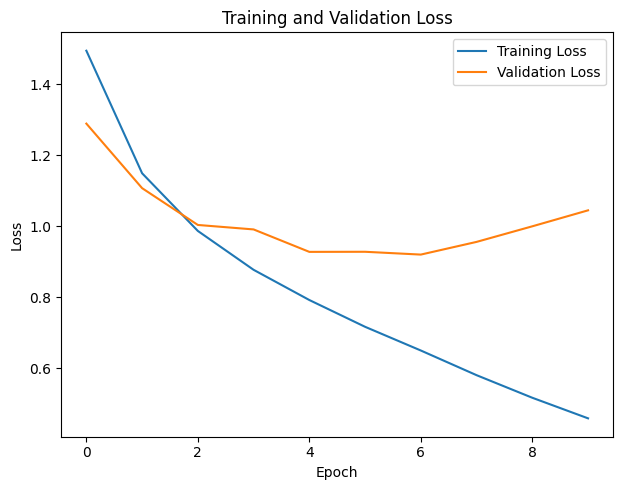

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

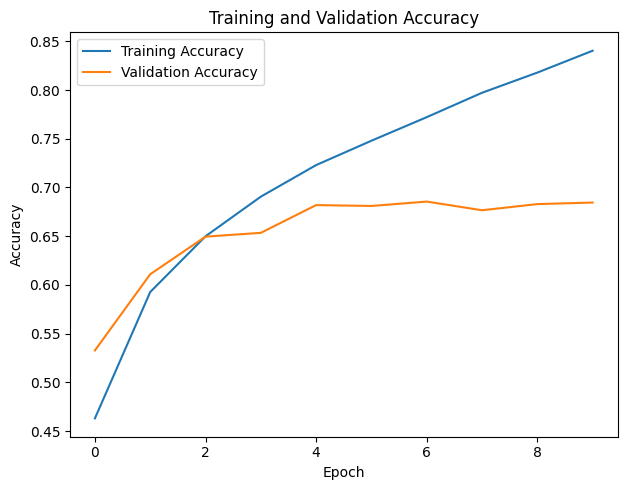

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Adding Dropout layer **0.5**

In [30]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout(x)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout(x)
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(-1, 128 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [31]:
model = CNN()

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
num_epochs = 10
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

In [34]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    val_running_loss = 0.0
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0

    # Training phase
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_loss_history.append(train_running_loss / len(train_loader))
    train_accuracy = train_correct / train_total
    train_accuracy_history.append(train_accuracy)

    # Validation phase
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
        val_loss_history.append(val_running_loss / len(val_loader))
        val_accuracy = val_correct / val_total
        val_accuracy_history.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss_history[-1]:.4f}, Validation Loss: {val_loss_history[-1]:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/10, Training Loss: 1.6737, Validation Loss: 1.3617, Training Accuracy: 0.3851, Validation Accuracy: 0.5194
Epoch 2/10, Training Loss: 1.3723, Validation Loss: 1.2108, Training Accuracy: 0.5017, Validation Accuracy: 0.5837
Epoch 3/10, Training Loss: 1.2633, Validation Loss: 1.1146, Training Accuracy: 0.5453, Validation Accuracy: 0.6131
Epoch 4/10, Training Loss: 1.1903, Validation Loss: 1.1175, Training Accuracy: 0.5725, Validation Accuracy: 0.6153
Epoch 5/10, Training Loss: 1.1432, Validation Loss: 0.9940, Training Accuracy: 0.5887, Validation Accuracy: 0.6614
Epoch 6/10, Training Loss: 1.0990, Validation Loss: 0.9500, Training Accuracy: 0.6073, Validation Accuracy: 0.6722
Epoch 7/10, Training Loss: 1.0774, Validation Loss: 1.0157, Training Accuracy: 0.6176, Validation Accuracy: 0.6434
Epoch 8/10, Training Loss: 1.0497, Validation Loss: 0.9645, Training Accuracy: 0.6275, Validation Accuracy: 0.6540
Epoch 9/10, Training Loss: 1.0289, Validation Loss: 0.9193, Training Accuracy: 0

In [35]:
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.6903


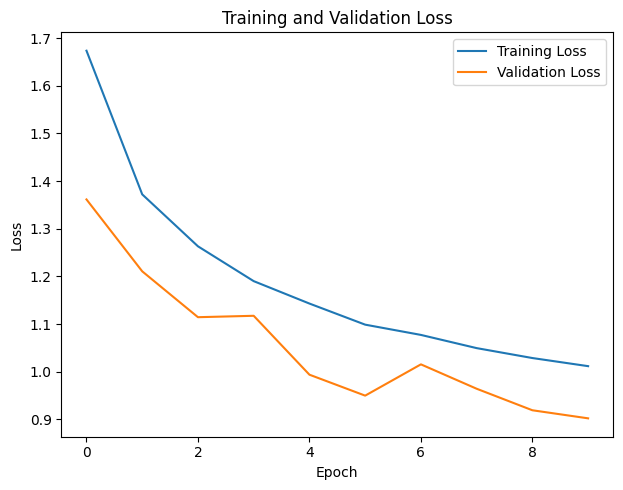

In [36]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

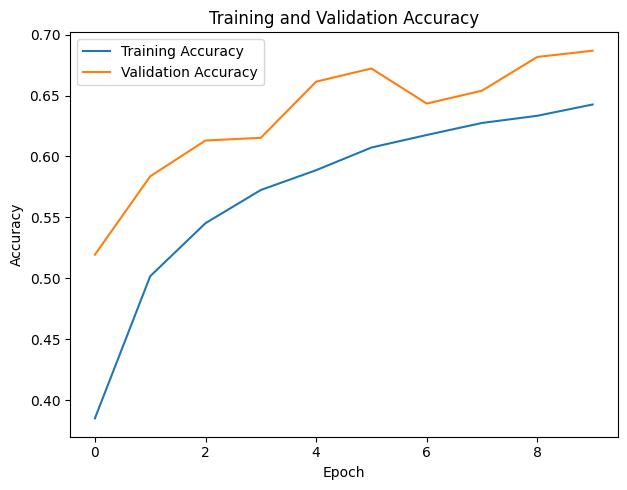

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()